In [1]:
import pandas as pd

C:\Users\saile\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:

df=pd.read_csv(r"C:\Users\saile\Downloads\weather_classification_data.csv")

In [5]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [6]:
import sweetviz

In [7]:
report=sweetviz.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [8]:
report.show_html('eda.html')

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Outliers

<Axes: >

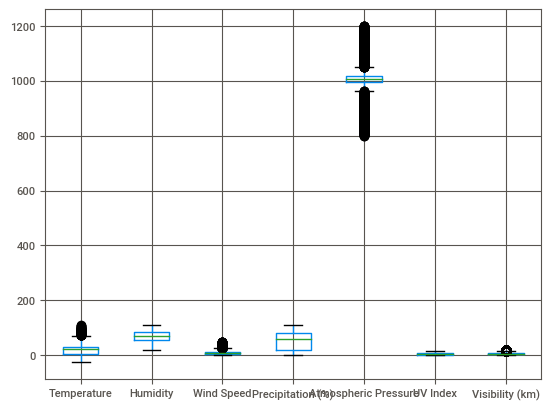

In [9]:
df.boxplot()

In [10]:
from feature_engine.outliers import Winsorizer

In [11]:
win=Winsorizer(capping_method='iqr',tail='both',fold=0.05)

In [12]:
win.fit_transform(df)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.00,73.00,9.500,82.00,partly cloudy,1010.820000,2.0,Winter,3.500,inland,Rainy
1,32.35,85.35,8.500,71.00,partly cloudy,1011.430000,7.0,Spring,7.725,inland,Cloudy
2,30.00,64.00,7.000,16.00,clear,1017.871125,5.0,Spring,5.500,mountain,Sunny
3,32.35,83.00,4.575,82.00,clear,1017.871125,7.0,Spring,2.775,coastal,Sunny
4,27.00,74.00,13.925,66.00,overcast,993.701375,1.0,Winter,2.775,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.00,74.00,13.925,71.00,overcast,1003.150000,1.0,Summer,2.775,mountain,Rainy
13196,2.65,76.00,4.575,23.00,cloudy,1017.871125,1.0,Winter,6.000,coastal,Snowy
13197,30.00,77.00,5.500,28.00,overcast,1012.690000,3.0,Autumn,7.725,coastal,Cloudy
13198,3.00,76.00,10.000,85.15,overcast,993.701375,0.7,Winter,2.775,inland,Snowy


In [13]:
nom=['Cloud Cover','Season','Location']
num=['Temperature','Humidity','Wind Speed','Precipitation (%)','Atmospheric Pressure','UV Index','Visibility (km)']

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [16]:
Nominal=Pipeline([('encoding',OneHotEncoder())])

In [17]:
Numarical=Pipeline([('Scaing',StandardScaler())])

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
Nominal=ColumnTransformer([('Nominal',Nominal,nom)])

In [20]:
Preprocess=ColumnTransformer([('Numarical',Numarical,num),
                              ('Nominal',Nominal,nom)])
Preprocess

ColumnTransformer(transformers=[('Numarical',
                                 Pipeline(steps=[('Scaing', StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('Nominal',
                                 ColumnTransformer(transformers=[('Nominal',
                                                                  Pipeline(steps=[('encoding',
                                                                                   OneHotEncoder())]),
                                                                  ['Cloud '
                                                                   'Cover',
                                                                   'Season',
                                                                   'Location'])]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model=Pipeline([('Preprocessing',Preprocess),
                ('Model',DecisionTreeClassifier())
               ])
model

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Numarical',
                                                  Pipeline(steps=[('Scaing',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'UV Index',
                                                   'Visibility (km)']),
                                                 ('Nominal',
                                                  ColumnTransformer(transformers=[('Nominal',
                                                                                   Pipeline(steps=[('encoding',
                                                                                                    OneHotEncoder())]),
                                                                                   ['Cloud '
                                                                                    'Cover',
                                                                                    'Season',
                                                                                    'Location'])]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('Model', DecisionTreeClassifier())])

In [23]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [24]:
x=df.drop('Weather Type',axis=1)
y=df['Weather Type']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [28]:
model.fit(x_train,y_train)
y_pre=model.predict(x_test)
accuracy_score(y_test,y_pre)

0.9068181818181819

In [29]:
new_data = pd.DataFrame({
    'Temperature': [25.0],
    'Humidity': [50],
    'Wind Speed': [5.0],
    'Precipitation (%)': [10.0],
    'Cloud Cover': ['clear'],
    'Atmospheric Pressure': [1015.0],
    'UV Index': [6],
    'Season': ['Summer'],
    'Visibility (km)': [8.0],
    'Location': ['coastal']
})

In [30]:
new_predictions = model.predict(new_data)

In [31]:
new_predictions[0]

'Sunny'

# Pickling

In [32]:
import pickle

In [33]:
pickle.dump(model,open("weather.pkl",'wb'))

In [34]:
pic=pickle.load(open("weather.pkl",'rb'))

In [35]:
df1 = pd.DataFrame({
    'Temperature': [27.0],
    'Humidity': [74],
    'Wind Speed': [17.0],
    'Precipitation (%)': [66.0],
    'Cloud Cover': ['overcast'],
    'Atmospheric Pressure': [990.67],
    'UV Index': [1],
    'Season': ['Winter'],
    'Visibility (km)': [2.5],
    'Location': ['mountain']
})

In [36]:
pic.predict(df1)[0]

'Rainy'

In [37]:
import os

In [38]:
os.getcwd()

'C:\\Users\\saile'